In [2]:
import os
from openai import OpenAI

client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)

response = client.responses.create(
    model="gpt-4o",
    instructions="You are a coding assistant that talks like a pirate.",
    input="How do I check if a Python object is an instance of a class?",
)

print(response.output_text)


OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [2]:
!pip install openai

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.3/359.3 KB 9.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 KB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 KB 2.7 MB/s eta 0:00:00


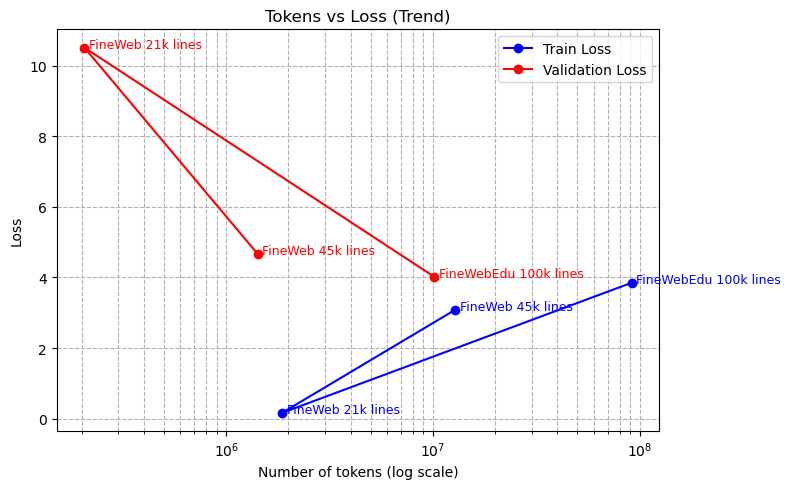

In [1]:
import matplotlib.pyplot as plt

# Dataset statistics
datasets = [
    {
        "name": "FineWebEdu 100k lines",
        "tokens_train": 91_424_958,
        "tokens_val": 10_166_081,
        "train_loss": 3.8491,
        "val_loss": 4.0157
    },
    {
        "name": "FineWeb 21k lines",
        "tokens_train": 1_863_360,
        "tokens_val": 205_782,
        "train_loss": 0.1658,
        "val_loss": 10.5094
    },
    {
        "name": "FineWeb 45k lines",
        "tokens_train": 12_821_411,
        "tokens_val": 1_423_755,
        "train_loss": 3.0856,
        "val_loss": 4.6557
    }
]

# Extract data
tokens_train = [d["tokens_train"] for d in datasets]
tokens_val = [d["tokens_val"] for d in datasets]
train_losses = [d["train_loss"] for d in datasets]
val_losses = [d["val_loss"] for d in datasets]
names = [d["name"] for d in datasets]

plt.figure(figsize=(8,5))

# Plot train loss trend
plt.plot(tokens_train, train_losses, marker='o', color='blue', label='Train Loss', linestyle='-')
# Plot validation loss trend
plt.plot(tokens_val, val_losses, marker='o', color='red', label='Validation Loss', linestyle='-')

# Log scale for x-axis
plt.xscale('log')
plt.xlabel("Number of tokens (log scale)")
plt.ylabel("Loss")
plt.title("Tokens vs Loss (Trend)")
plt.grid(True, which="both", ls="--")

# Annotate points
for i, name in enumerate(names):
    plt.text(tokens_train[i]*1.05, train_losses[i], name, fontsize=9, color='blue')
    plt.text(tokens_val[i]*1.05, val_losses[i], name, fontsize=9, color='red')

plt.legend()
plt.tight_layout()
plt.show()
